In [1]:
import sys

sys.path.append("../")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO
import numpy as np
from scripts.results import show_yolo_prediction

In [3]:
sns.set_theme(style="whitegrid", context="talk", palette="Set2")

#### Training Results

In [ ]:
results = pd.read_csv("../models/final_model/results.csv")

96

In [5]:
results

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2,val_total_loss
0,1,40.3777,2.00972,14.51230,1.48559,0.57063,0.44821,0.46239,0.21361,1.90325,2.08288,1.37030,0.000662,0.000662,0.000662,5.35643
1,2,71.5069,1.87711,1.93821,1.42453,0.55452,0.40113,0.41739,0.19669,1.90470,2.22028,1.34355,0.001328,0.001328,0.001328,5.46853
2,3,102.6130,1.86803,1.79874,1.41091,0.65033,0.53672,0.53641,0.24490,1.85767,13.53300,1.36033,0.001993,0.001993,0.001993,16.75100
3,4,133.5420,1.78793,1.64214,1.36737,0.60788,0.48756,0.49878,0.20316,2.01519,1.93436,1.38907,0.001996,0.001996,0.001996,5.33862
4,5,164.4080,1.75617,1.57372,1.35582,0.68952,0.48515,0.54198,0.26491,1.85844,1.88290,1.30191,0.001992,0.001992,0.001992,5.04325
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,2974.6000,1.31221,0.63178,1.13169,0.86570,0.82674,0.87053,0.48772,1.53980,0.86491,1.16396,0.000032,0.000032,0.000032,3.56867
96,97,3005.4900,1.29456,0.62273,1.12340,0.87501,0.83055,0.87487,0.49177,1.54071,0.85824,1.16513,0.000028,0.000028,0.000028,3.56408
97,98,3036.3800,1.29798,0.61739,1.13083,0.86834,0.83221,0.87505,0.48948,1.54342,0.86131,1.17015,0.000024,0.000024,0.000024,3.57488
98,99,3067.2500,1.30317,0.62169,1.12490,0.86435,0.82800,0.87374,0.49128,1.54824,0.86588,1.17130,0.000022,0.000022,0.000022,3.58542


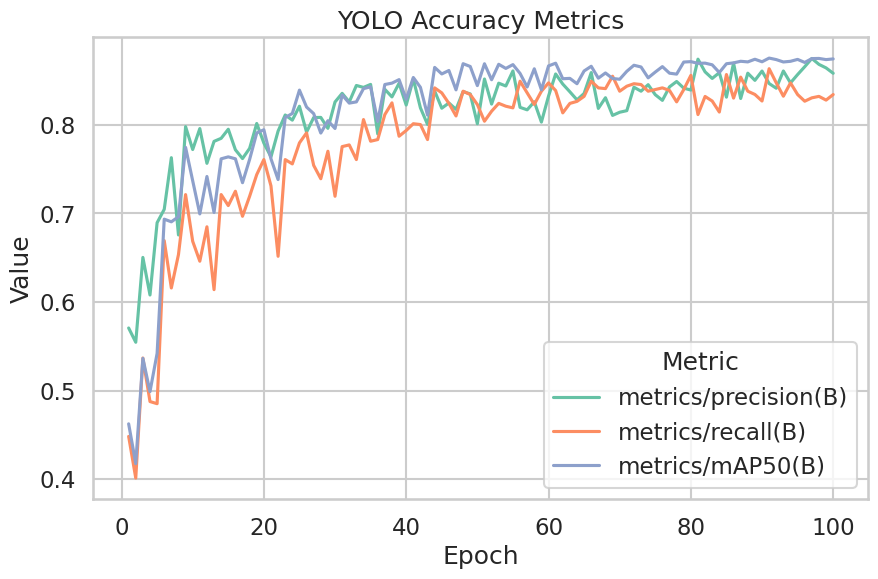

In [6]:
metrics = [
    "metrics/precision(B)",
    "metrics/recall(B)",
    "metrics/mAP50(B)",
]

df = results.melt(
    id_vars="epoch", value_vars=metrics, var_name="metric", value_name="value"
)

plt.figure(figsize=(10, 6))
sns.lineplot(df, x="epoch", y="value", hue="metric")
plt.title("YOLO Accuracy Metrics")
plt.ylabel("Value")
plt.xlabel("Epoch")
plt.legend(title="Metric")

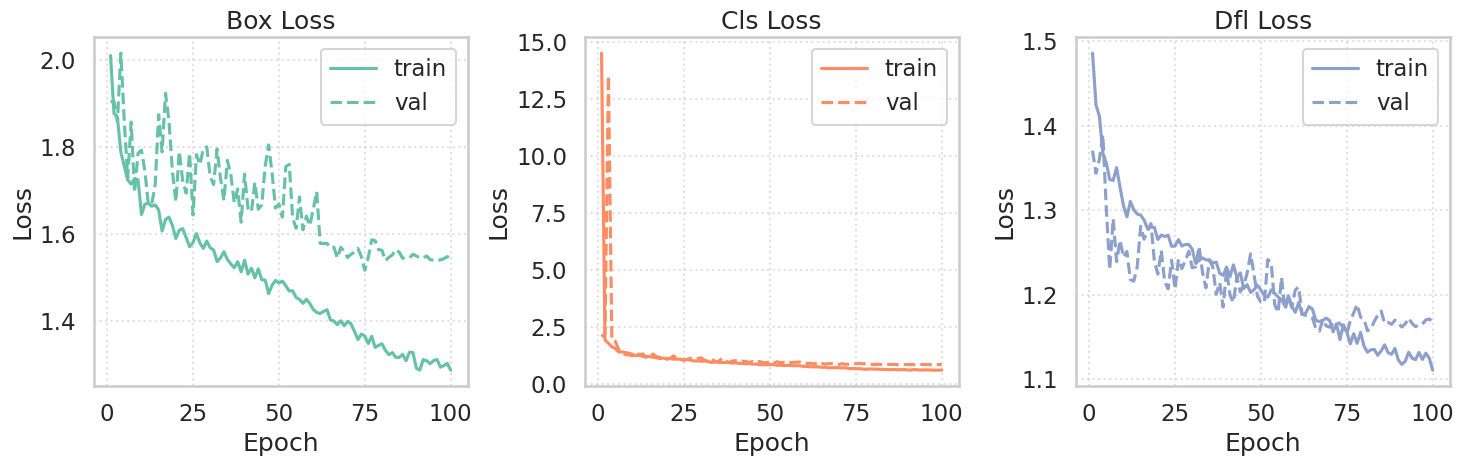

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

losses = ["box_loss", "cls_loss", "dfl_loss"]

for i, loss in enumerate(losses):
    ax = axes[i]
    train_col = f"train/{loss}"
    val_col = f"val/{loss}"

    sns.lineplot(
        data=results,
        x="epoch",
        y=train_col,
        ax=ax,
        label="train",
        color=sns.color_palette()[i],
    )
    sns.lineplot(
        data=results,
        x="epoch",
        y=val_col,
        ax=ax,
        label="val",
        linestyle="--",
        color=sns.color_palette()[i],
    )

    ax.set_title(loss.replace("_", " ").title())
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend()
    ax.grid(True, linestyle=":", alpha=0.6)

plt.tight_layout()
plt.show()

#### Prediction Results

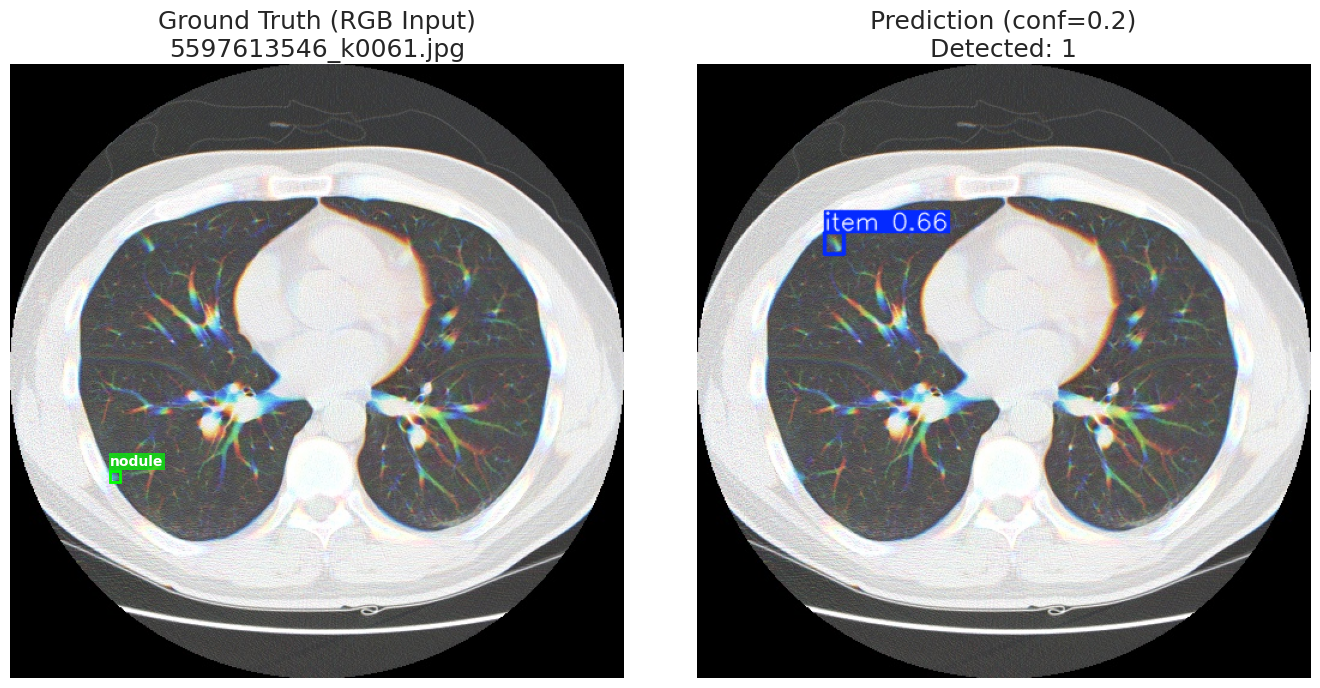

In [8]:
show_yolo_prediction(
    model_path="../models/final_model/weights/best.pt",
    root_dir="../data/test",
    split="val",
    class_names=["nodule"],
    conf=0.2,  # change confidence here
)

In [9]:
model = YOLO("../models/final_model/weights/best.pt")

metrics = model.val(
    data="../data/test/ct.yaml",
    project="../models",
    name="final_model_0.0001",
    exist_ok=True,
    split="val",
    conf=0.0001,  # set low to see how metrics change with confidence
    iou=0.5,
    verbose=False,
)

Ultralytics 8.3.228 🚀 Python-3.13.6 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 15940MiB)
YOLO11s summary (fused): 100 layers, 9,413,187 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8673.2±1365.5 MB/s, size: 99.8 KB)
val: Scanning /home/nkoranda/Projects/capstone/data/test/labels/val.cache... 581 images, 63 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 581/581 3.4Mit/s 0.0s0s


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 37/37 8.5it/s 4.3s0.1s
                   all        581        531       0.87      0.832      0.874      0.478
Speed: 0.9ms preprocess, 5.4ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to /home/nkoranda/Projects/capstone/models/final_model_0.0001


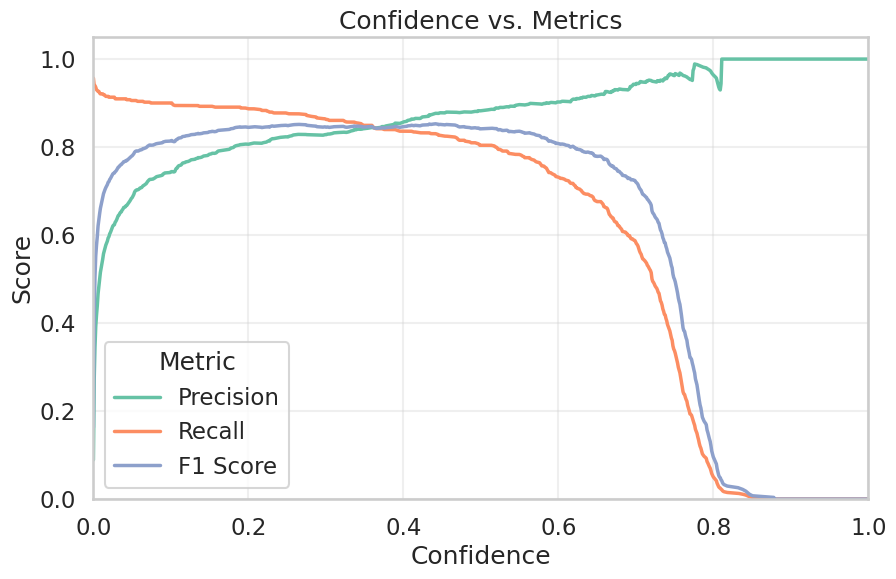

In [10]:
df = pd.DataFrame(
    {
        "Confidence": np.linspace(0, 1, 1000),
        "Precision": metrics.box.p_curve[0],
        "Recall": metrics.box.r_curve[0],
        "F1 Score": metrics.box.f1_curve[0],
    }
)

df_long = df.melt("Confidence", var_name="Metric", value_name="Score")

# 3. Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_long, x="Confidence", y="Score", hue="Metric", linewidth=2.5)

plt.title("Confidence vs. Metrics")
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.ylim(0, 1.05)
plt.show()

In [ ]:
metrics = model.val(
    data="../data/test/ct.yaml",
    project="../models",
    name="final_model_0.1",
    exist_ok=True,
    split="val",
    conf=0.1,  # change conf here
    iou=0.5,
    verbose=False,
)

Ultralytics 8.3.228 🚀 Python-3.13.6 torch-2.9.1+cu128 CUDA:0 (NVIDIA GeForce RTX 4070 Ti SUPER, 15940MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 8334.3±2552.4 MB/s, size: 92.0 KB)
val: Scanning /home/nkoranda/Projects/capstone/data/test/labels/val.cache... 581 images, 63 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 581/581 3.8Mit/s 0.0s0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 37/37 8.6it/s 4.3s0.1s
                   all        581        531       0.87      0.832      0.885      0.519
Speed: 0.9ms preprocess, 5.4ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /home/nkoranda/Projects/capstone/models/final_model_0.44


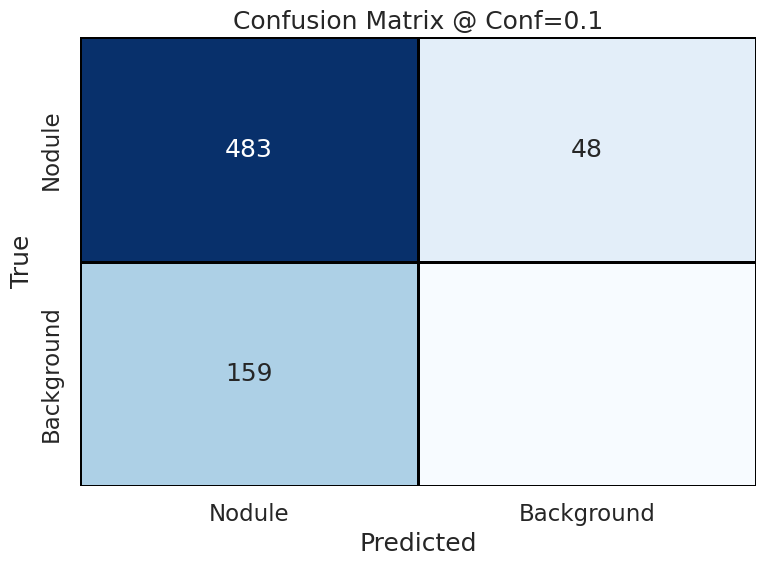

In [18]:
cm_obj = metrics.confusion_matrix
cm = cm_obj.matrix.T


annot_labels = np.empty_like(cm, dtype=object)
rows, cols = cm.shape

for i in range(rows):
    for j in range(cols):
        val = int(cm[i, j])
        annot_labels[i, j] = f"{val}" if val > 0 else ""

# Plot
plt.figure(figsize=(8, 6))

sns.heatmap(
    cm,
    annot=annot_labels,
    fmt="",
    cmap="Blues",
    cbar=False,
    xticklabels=["Nodule", "Background"],
    yticklabels=["Nodule", "Background"],
    linewidths=1,
    linecolor="black",
)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix @ Conf=0.1")
plt.tight_layout()
plt.show()